# __Self Correlation__ (R)

At its most fundamental, self-correlation of a time series is the idea that a value in a
time series at one given point in time may have a correlation to the value at another
point in time. 

As an example of self correlation, if you take a yearly time series of daily temperature
data, you may find that comparing May 15th of every year to August 15th of every
year will give you some correlation, such that hotter May 15ths tend to correlate with
hotter August 15ths (or tend to correlate with cooler August 15ths). You may feel you
have learned a potentially interesting fact about the temperature system, indicating
that there is a certain amount of long-term predictability. On the other hand, you
may find the correlation closer to zero, in which case you will also have found some‐
thing interesting, namely that knowing the temperature on May 15th does not alone
give you any information about the likely range of temperatures on August 15th.
That is self-correlation in an anecdotal nutshell.

### Autocorrelation
From this simple example, we are going to expand into autocorrelation, which gener‐
alizes self-correlation by not anchoring to a specific point in time. In particular, auto‐
correlation asks the more general question of whether there is a correlation between them.

Autocorrelation, also known as serial correlation, is the correlation of a signal with a
delayed copy of itself as a function of the delay. Informally, it is the similarity between
observations as a function of the time lag between them.

Let’s translate that into plainer English. Autocorrelation gives you an idea of how
data points at different points in time are linearly related to one another as a function
of their time difference.
The autocorrelation function (ACF) can be intuitively understood with plotting. We
can plot it easily in R

In [2]:
x <- 1:100
y <- sin(x * pi / 3)

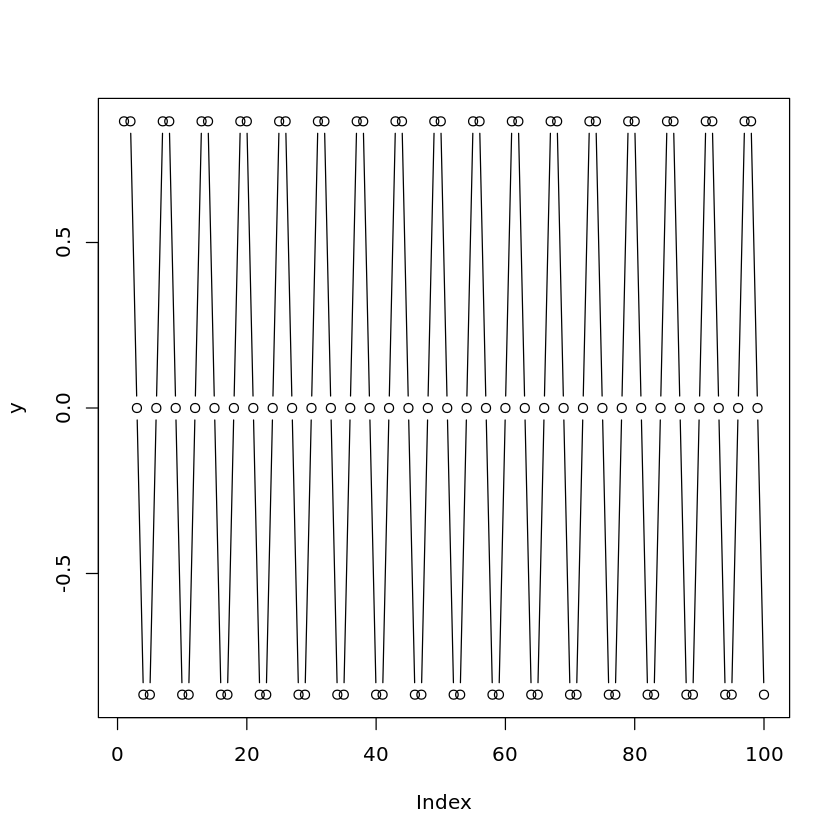

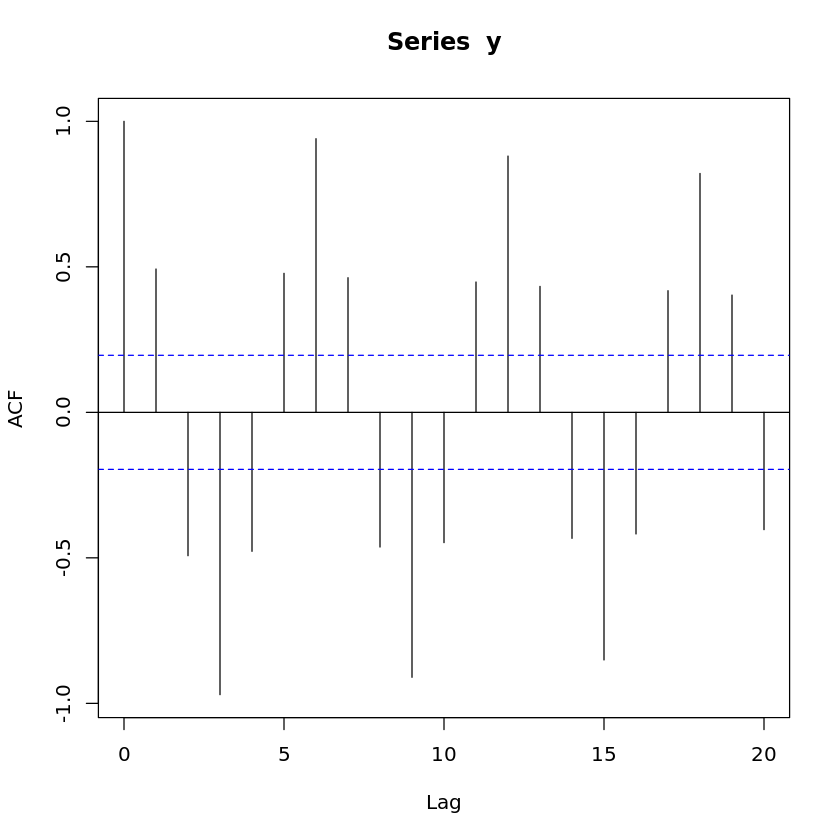

In [3]:
plot(y, type = 'b')
acf(y)

This sine series is a simple function and a fully determined system given a known
input sequence. Nonetheless, we do not have a correlation of 1. Why is that? Inspect
the series and think about what the ACF is calculating, and you will realize that for
many values, the subsequent value can go either up or down depending on where you
are in the cycle. If you know a few points in a row, you know which direction the
process is going, but if you don’t (as with the ACF, which is a 1:1 correlation
measure), you will have a correlation of less than 1 because most values do not have a
unique subsequent value but rather more than one. So, remember that a nonunitary
correlation does not mean you necessarily have a probabilistic or noisy time series.


Calculating the ACF is straightforward. We can do it ourselves using `data.table`’s
`shift()` function

In [4]:
library(data.table)

In [5]:
cor(y, shift(y, 1), use = 'pairwise.complete.obs')

[1] 0.5001531

In [6]:
cor(y, shift(y, 2), use = 'pairwise.complete.obs')

[1] -0.5037152

There are a few important facts about the ACF, mathematically speaking:


- The ACF of a periodic function has the same periodicity as the original process.
You can see this in the preceding sine example plots.
- The autocorrelation of the sum of periodic functions is the sum of the autocorre‐
lations of each function separately. You can easily formulate an example of this
with some simple code.
- All time series have an autocorrelation of 1 at lag 0.
- e autocorrelation of a sample of white noise will have a value of approximately
0 at all lags other than 0.
- e ACF is symmetric with respect to negative and positive lags, so only positive
lags need to be considered explicitly. You can try plotting a manually calculated
ACF to prove this.
- statistical rule for determining a significant nonzero ACF estimate is given by a
“critical region” with bounds at +/–1.96 × sqrt(n). This rule relies on a suffi‐
ciently large sample size and a finite variance for the process.


### Partial AutoCorrelation Function

The partial autocorrelation function (PACF) can be trickier to understand than the
ACF. The partial autocorrelation of a time series for a given lag is the partial correla‐
tion of the time series with itself at that lag given all the information between the two
points in time

In [7]:
y <- sin(x * pi / 3)

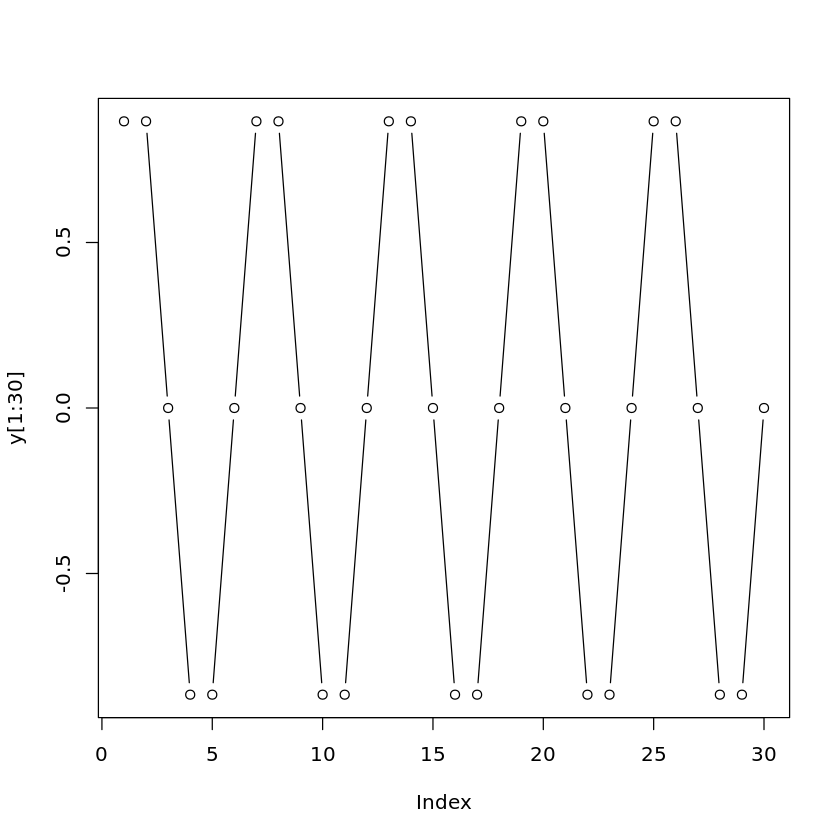

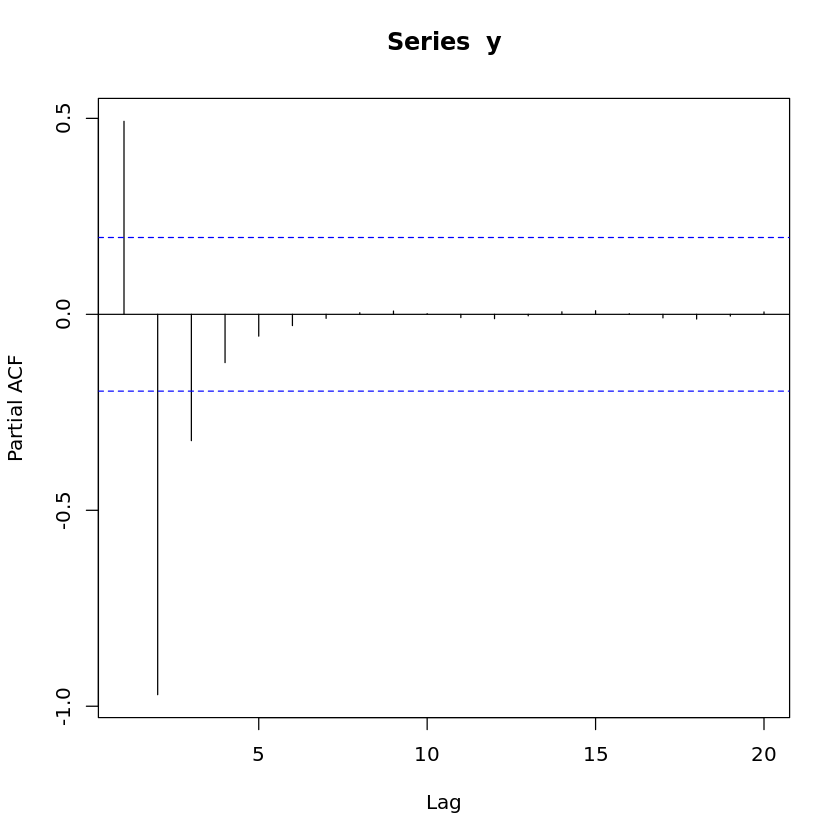

In [8]:
plot(y[1:30], type = 'b')
pacf(y)

For the case of a sine series, the PACF provides a striking contrast to the ACF. The
PACF shows which data points are informative and which are harmonics of shorter
time periods.

For a seasonal and noiseless process, such as the sine function, with period T, the
same ACF value will be seen at T, 2T, 3T, and so on up to infinity. An ACF fails to
weed out these redundant correlations. The PACF, on the other hand, reveals which
correlations are “true” informative correlations for specific lags rather than redun‐
dancies. This is invaluable for knowing when we have collected enough information
to get a sufficiently long window at a proper temporal scale for our data.
The critical region for the PACF is the same as for the ACF. The critical region has
bounds at ±1.96 sqrt(n). Any lags with calculated PACF values falling inside the critical
region are effectively zero.

We have so far looked only at examples of perfectly noiseless single-frequency pro‐
cesses. Now we look at a slightly more complicated example. We’ll consider the sum
of two sine curves under no noise, low noise, and high noise conditions.


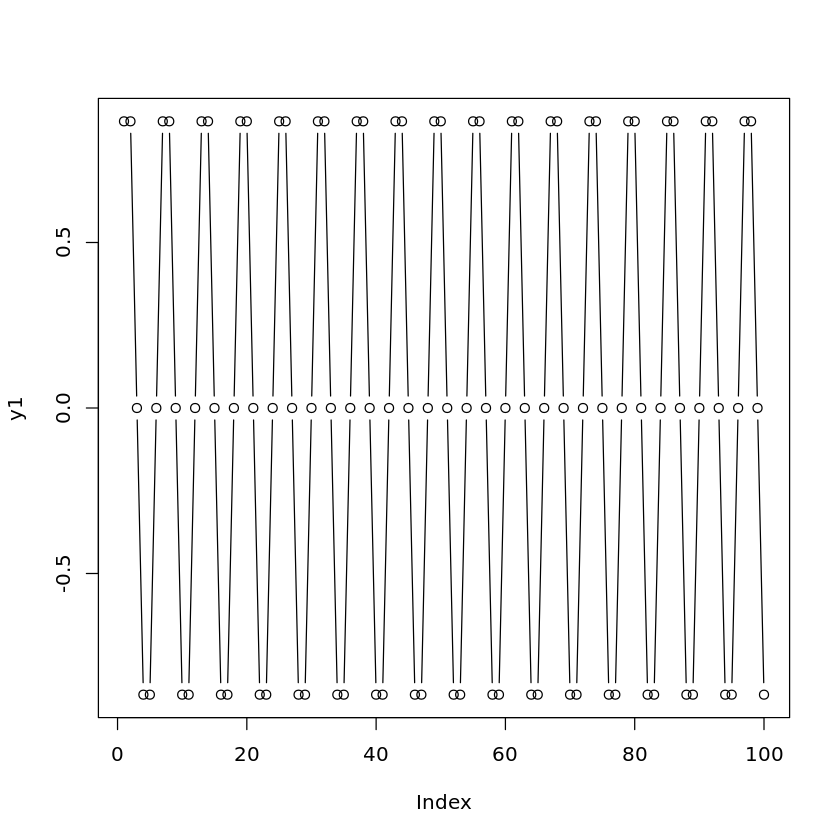

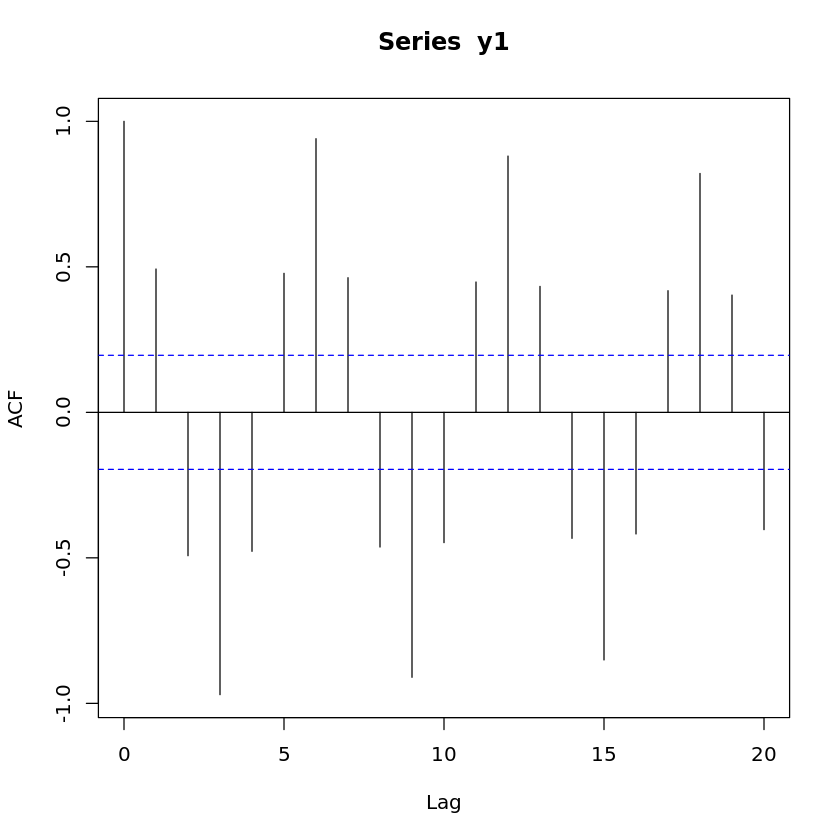

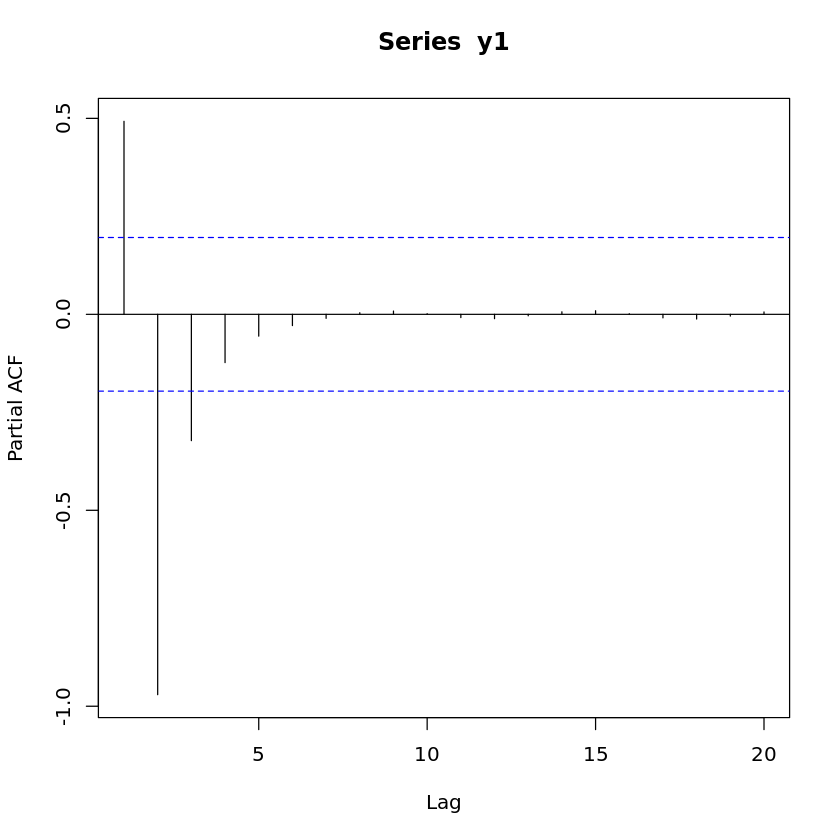

In [9]:
# first let's look at the plots with no noise
y1 <- sin(x * pi / 3)
plot(y1, type = 'b')
acf(y1)
pacf(y1)

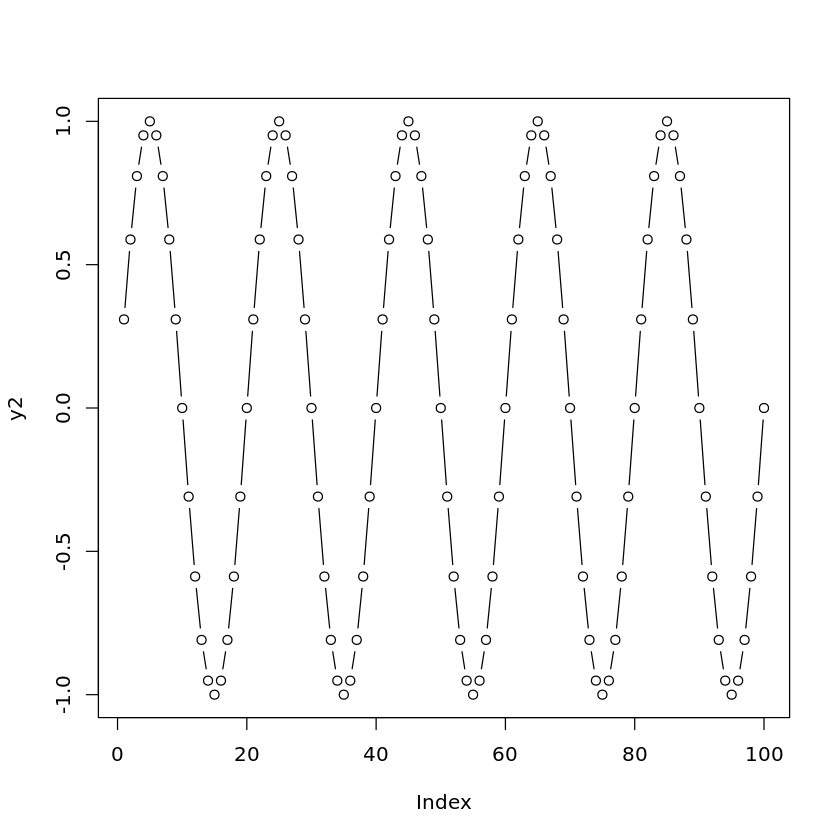

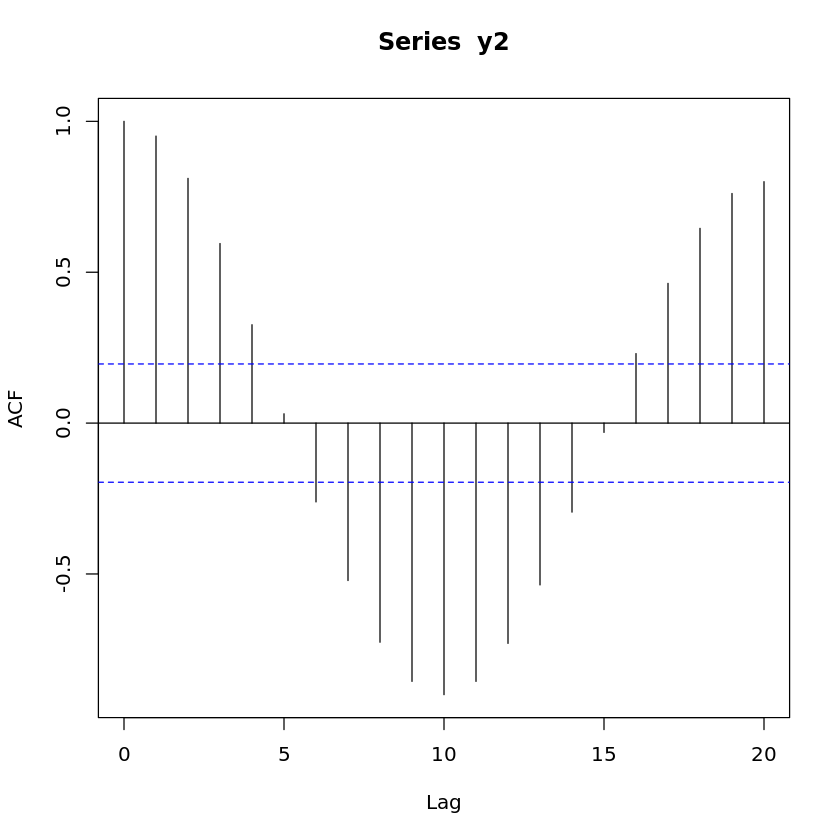

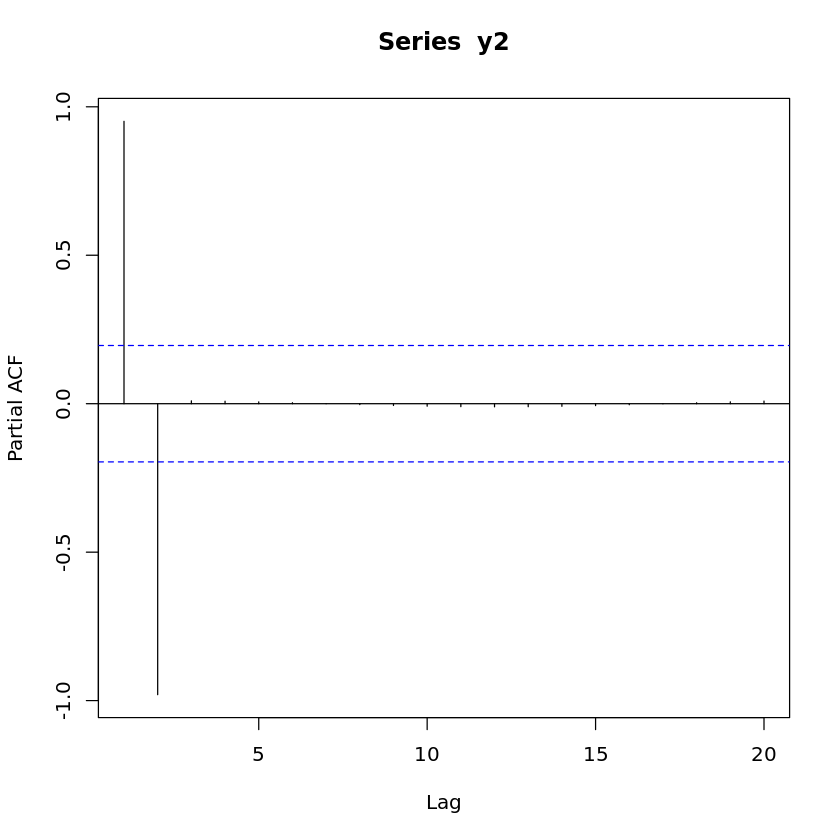

In [10]:
y2 <- sin(x * pi/10)
plot(y2, type = 'b')
acf(y2)
pacf(y2)

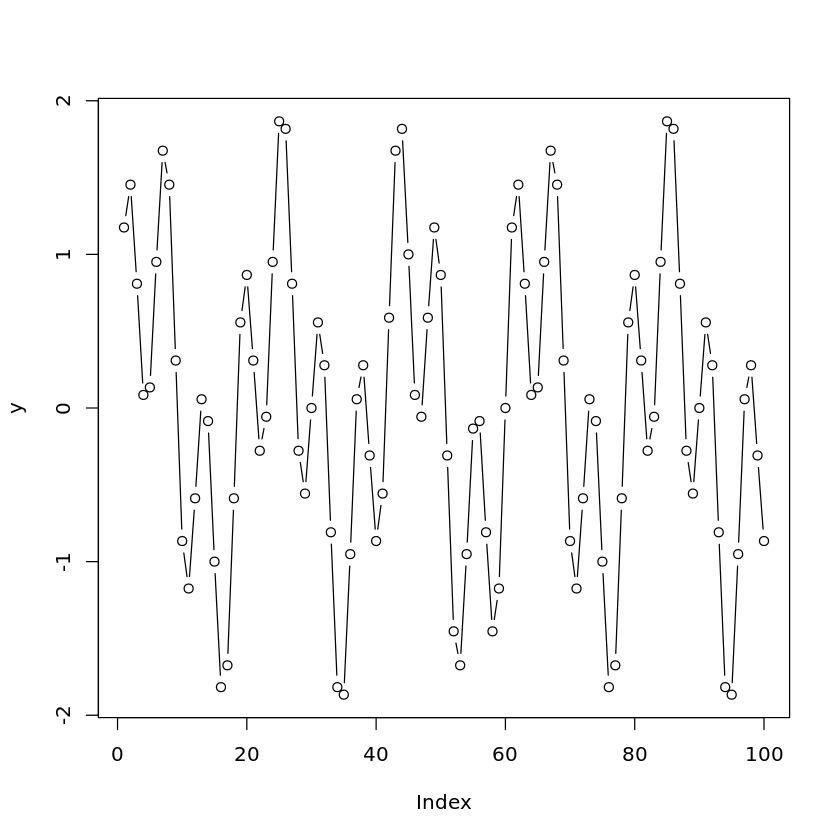

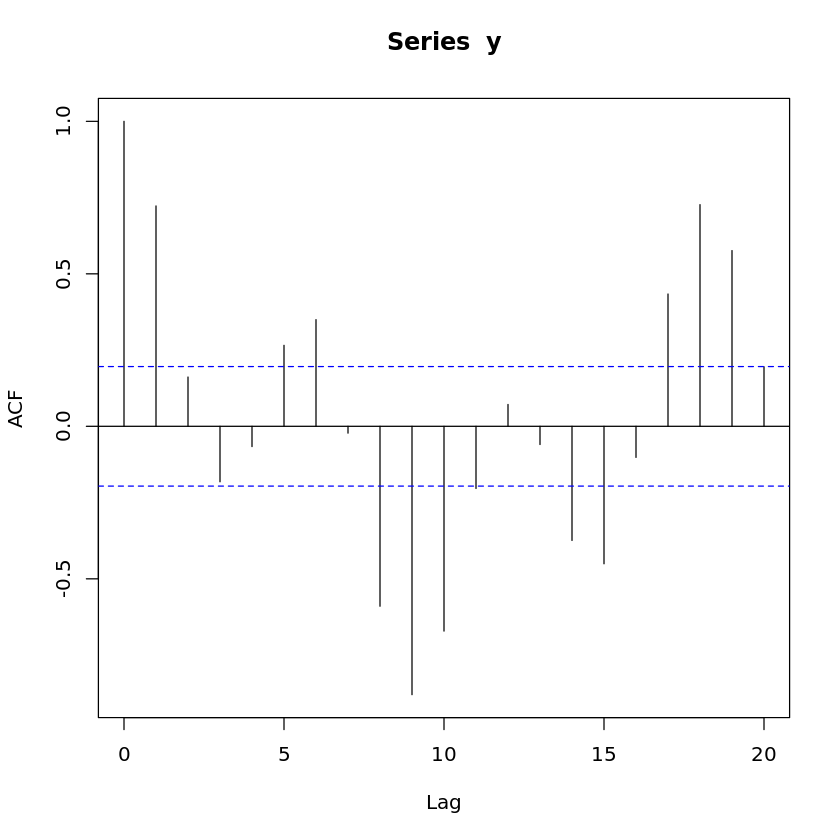

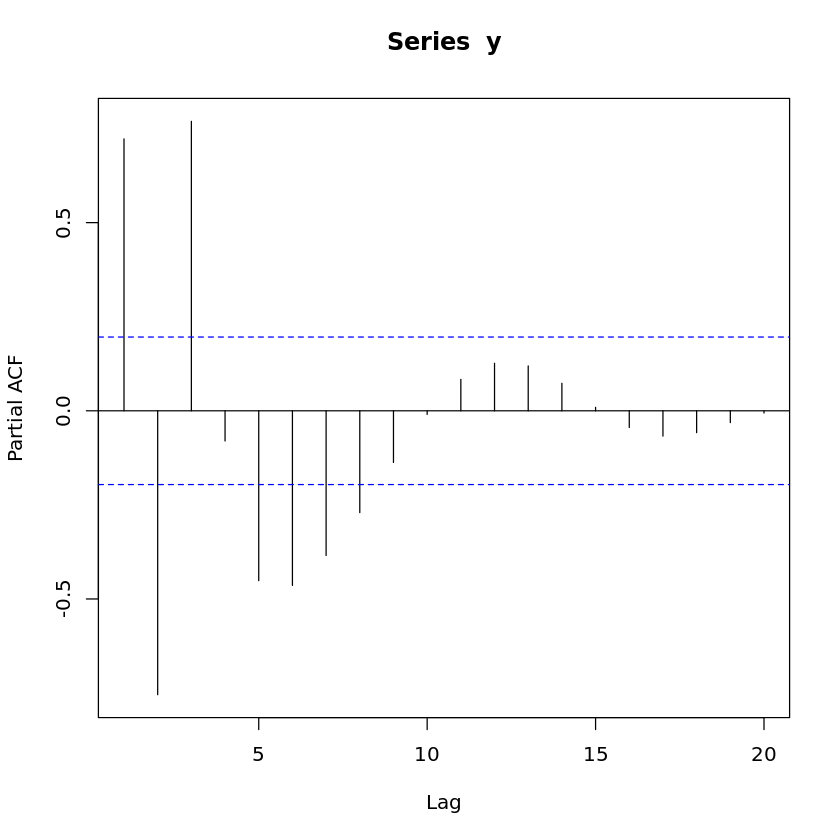

In [11]:
# We combine the two series by summing and create
# the same plots for the summed series
y <- y1 + y2
plot(y, type = 'b')
acf(y)
pacf(y)

As we can see, our ACF plot is consistent with the aforementioned property; the ACF
of the sum of two periodic series is the sum of the individual ACFs. You can see this
most clearly by noticing the positive → negative → positive → negative sections of the
ACF correlating to the more slowly oscillating ACF. Within these waves, you can see
the faster fluctuation of the higher-frequency ACF.

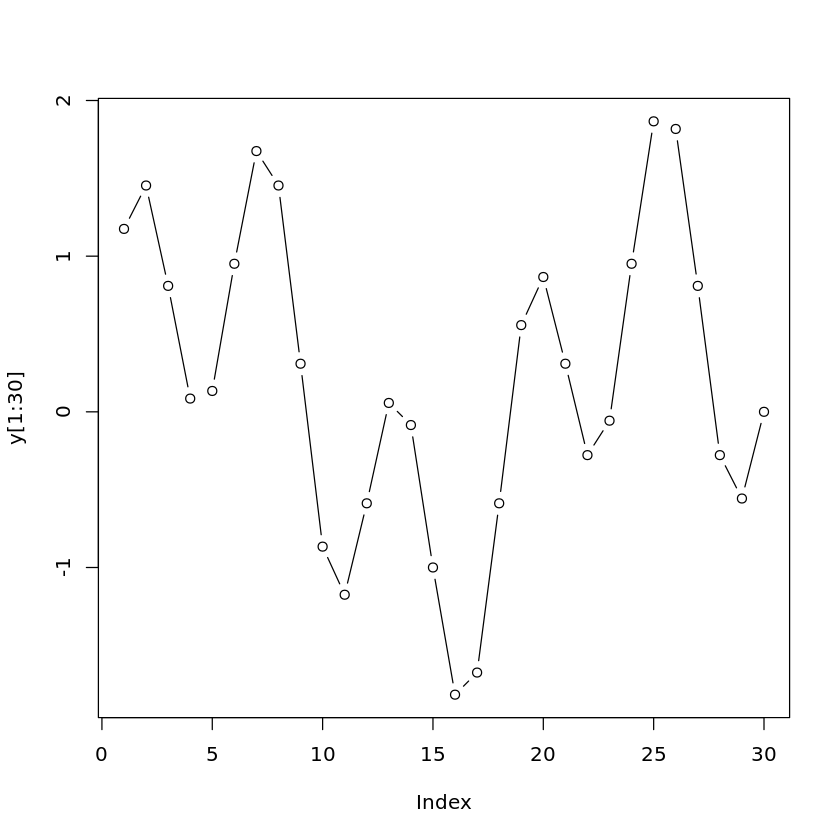

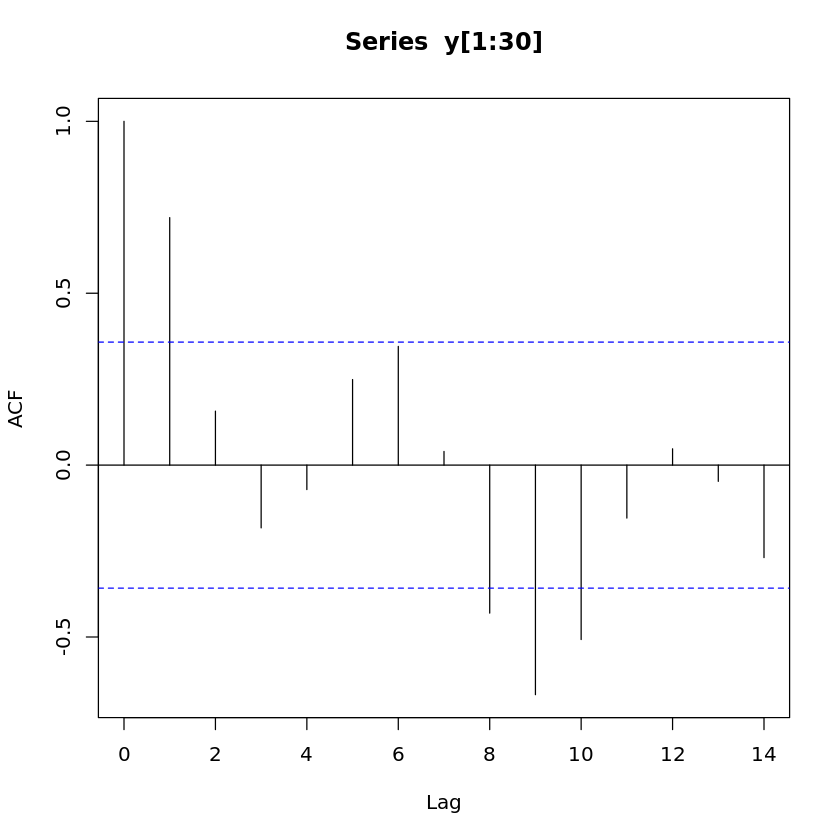

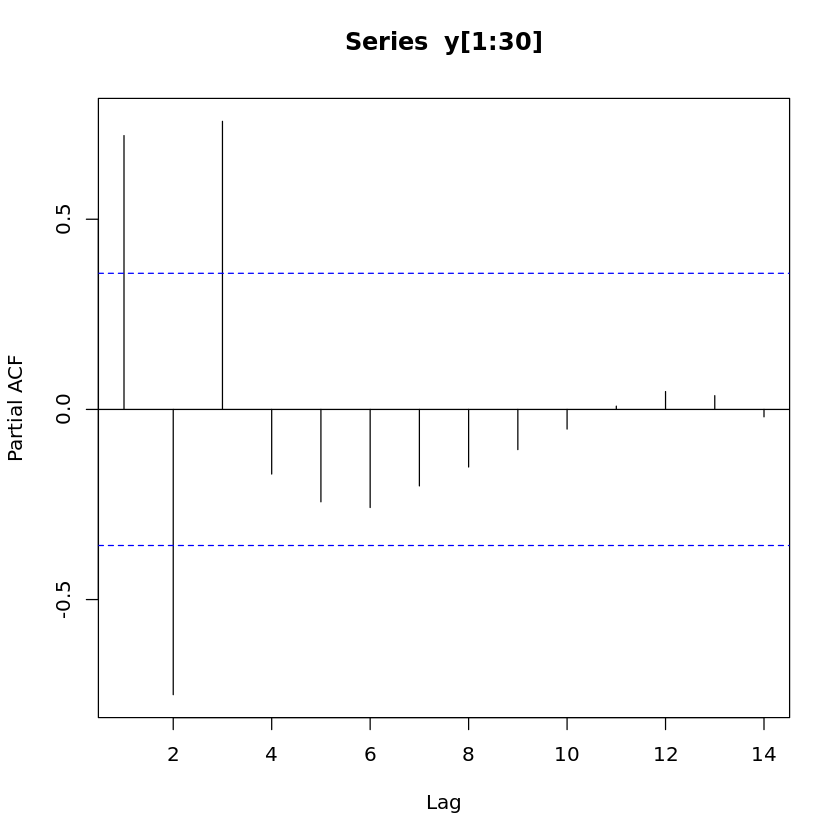

In [15]:
y <- y1 + y2
plot(y[1:30], type = 'b')
acf(y[1:30])
pacf(y[1:30])

The PACF is not a straightforward sum of the PACF functions of the individual com‐
ponents. A PACF is simple enough to understand once it is calculated, but it’s not so
easy to generate or predict. This PACF indicates that partial autocorrelation is more
substantial in the summed series than in either of the original series. That is, the cor‐
relation between points separated by a certain lag, when accounting for the values of
the points between them, is more informative in the summed series than in the origi‐
nal series. This is related to the two different periods of the series, which result in any
given point being less determined by the values of neighboring points since the loca‐
tion within the cycle of the two periods is less fixed now as the oscillations continue
at different frequencies.

Let’s look at the same situation, but with more noise

In [16]:
noise1 <- rnorm(100, sd = 0.05)
noise2 <- rnorm(100, sd = 0.05)

In [17]:
y1 <- y1 + noise1
y2 <- y2 + noise2
y <- y1 + y2

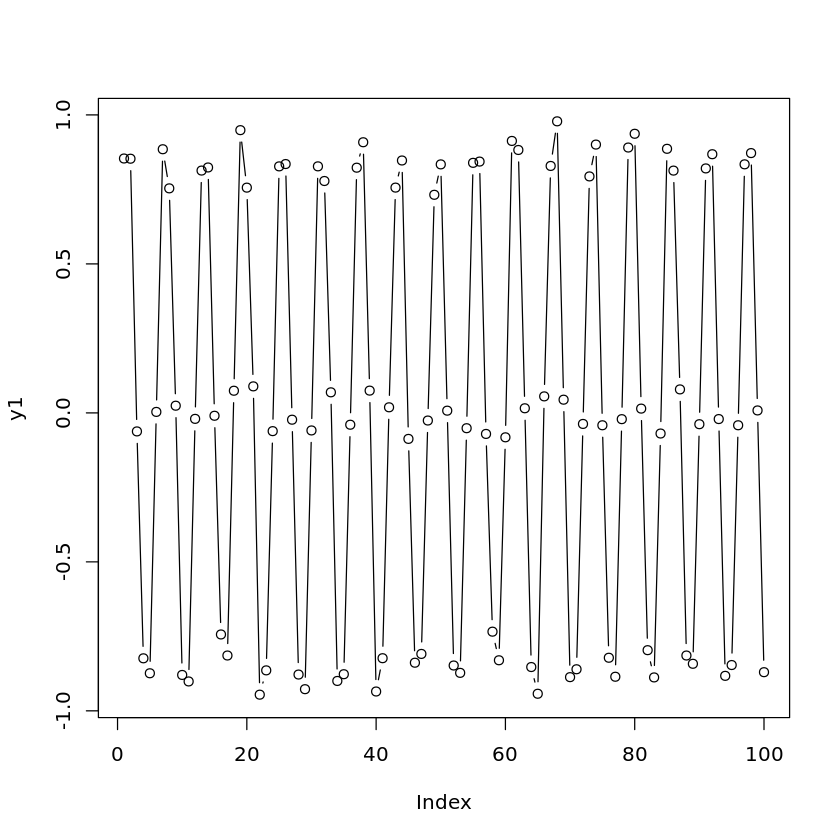

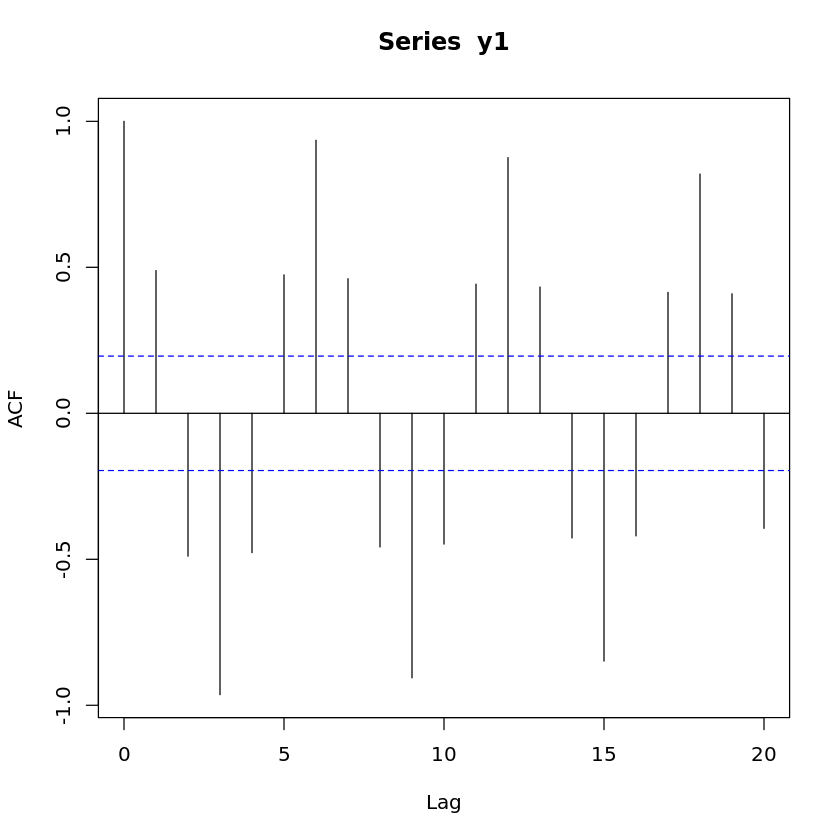

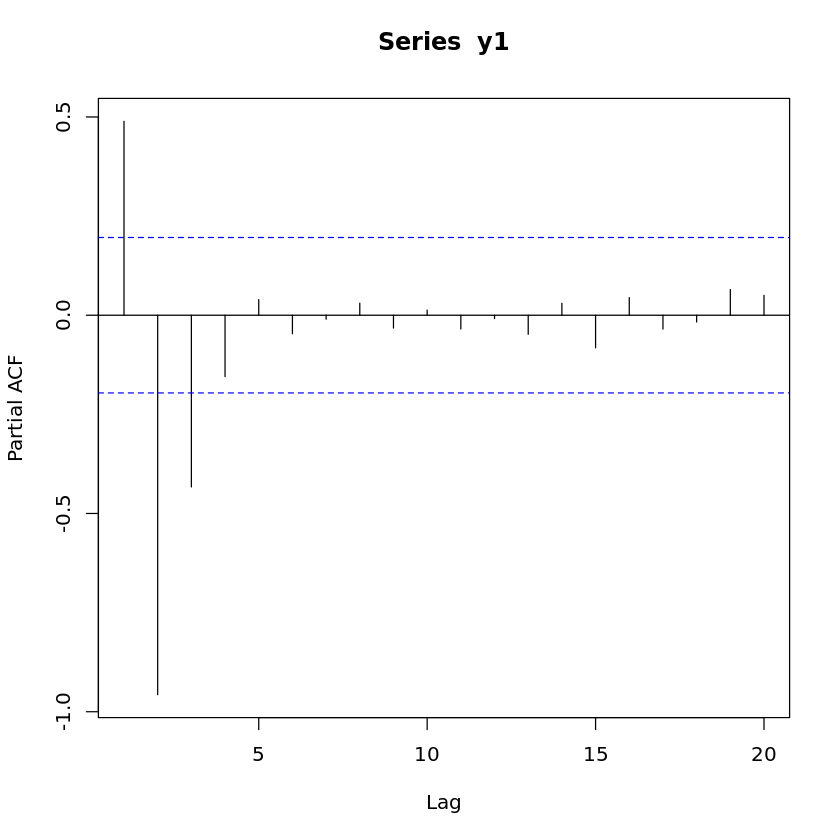

In [18]:
plot(y1, type = 'b')
acf(y1)
pacf(y1)

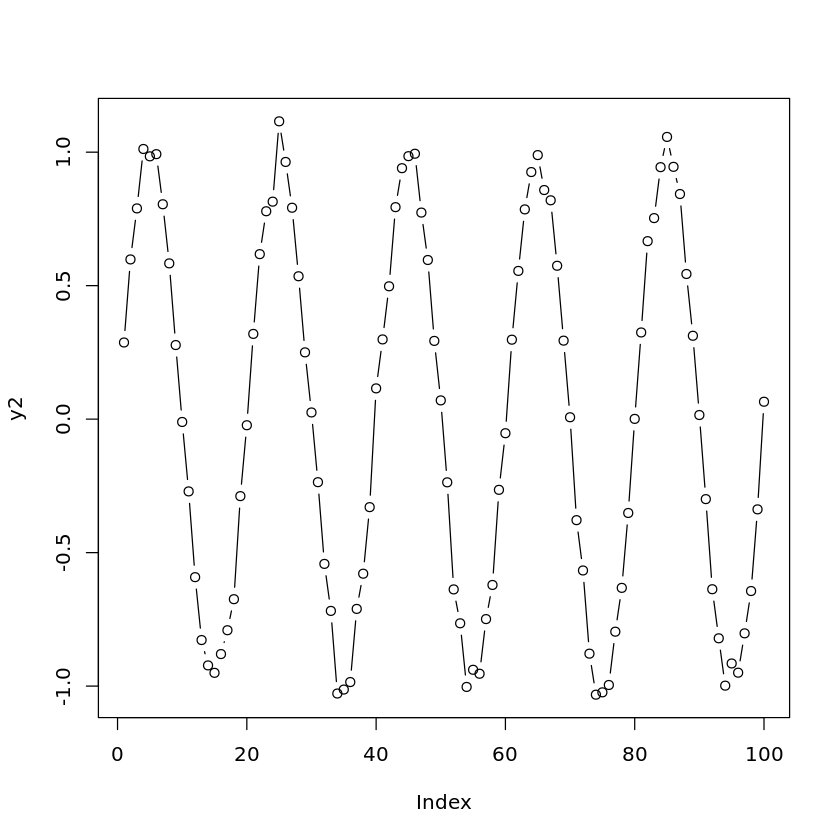

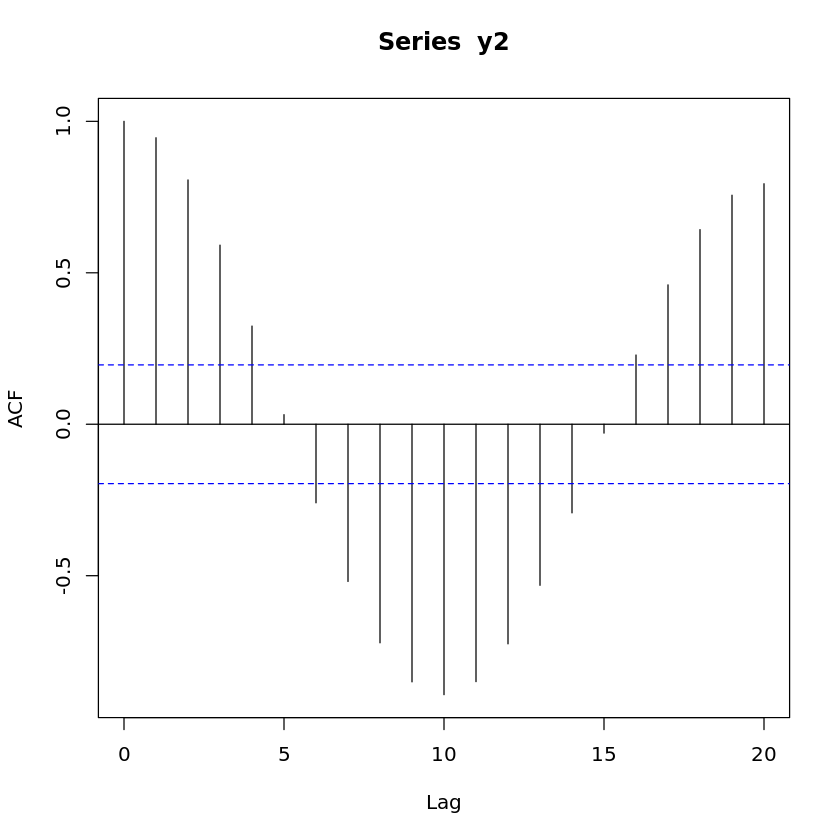

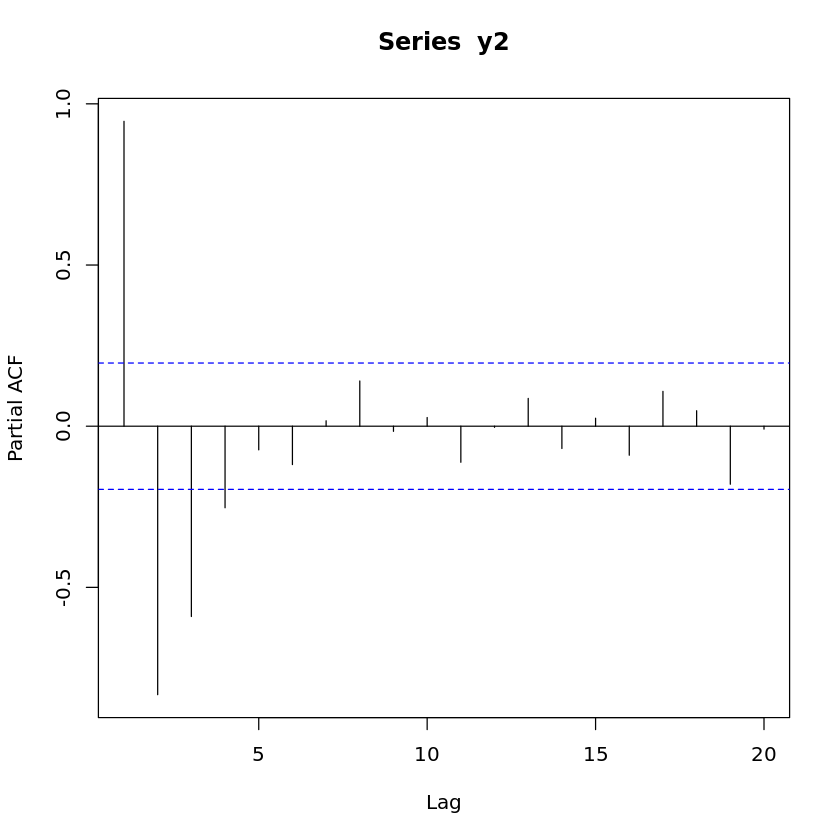

In [19]:
plot(y2, type = 'b')
acf(y2)
pacf(y2)

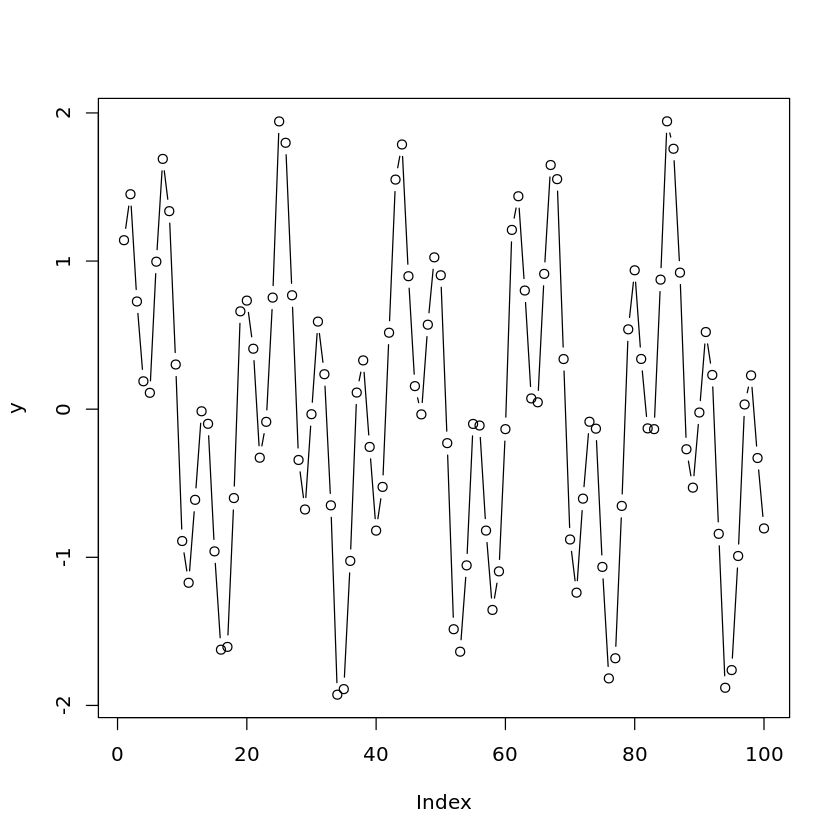

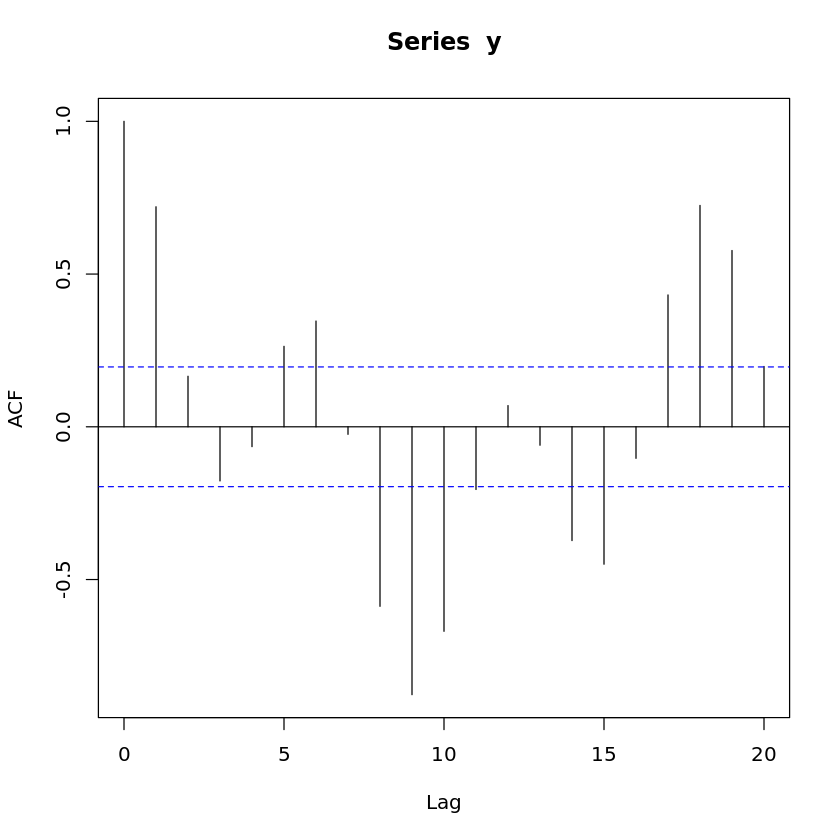

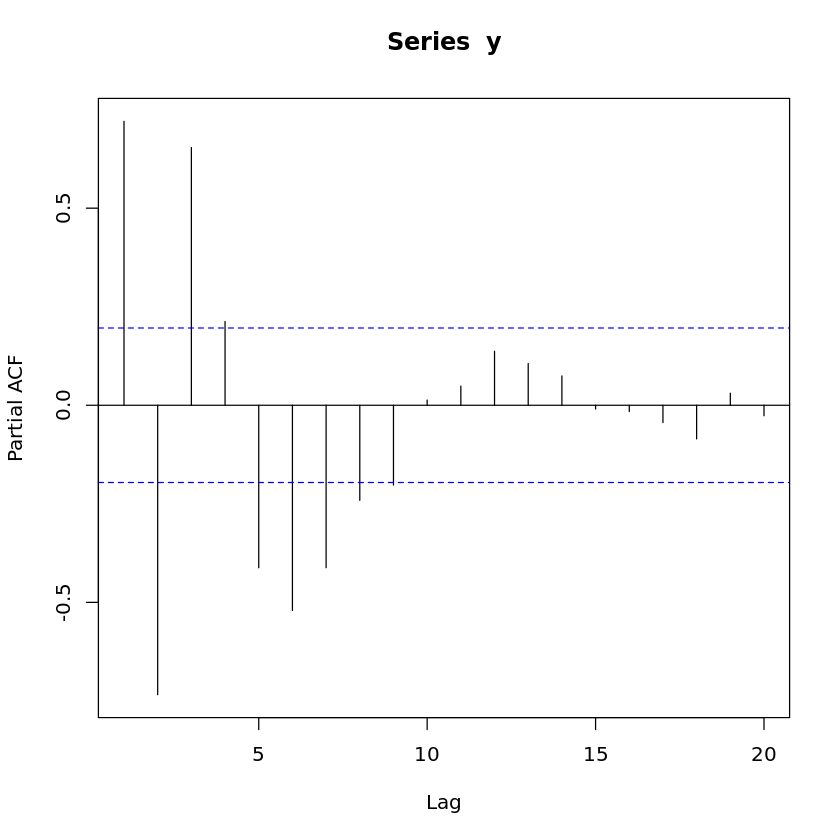

In [20]:
plot(y, type = 'b')
acf(y)
pacf(y)

### Nonstationary Data
Let’s consider how the ACF and PACF would look in the event of a series with a
trend but no cycle

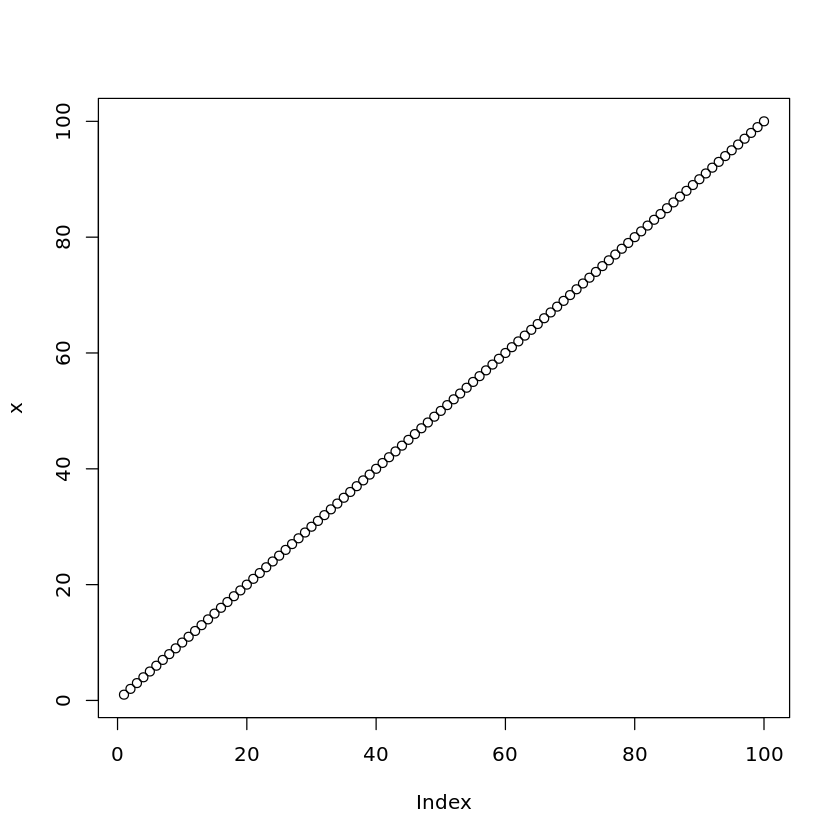

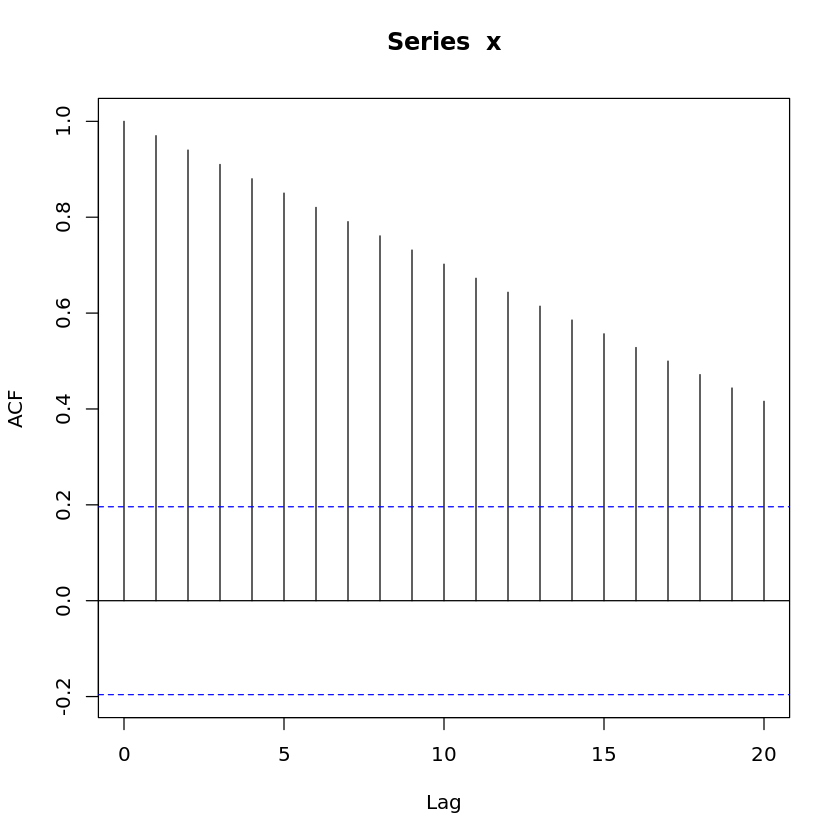

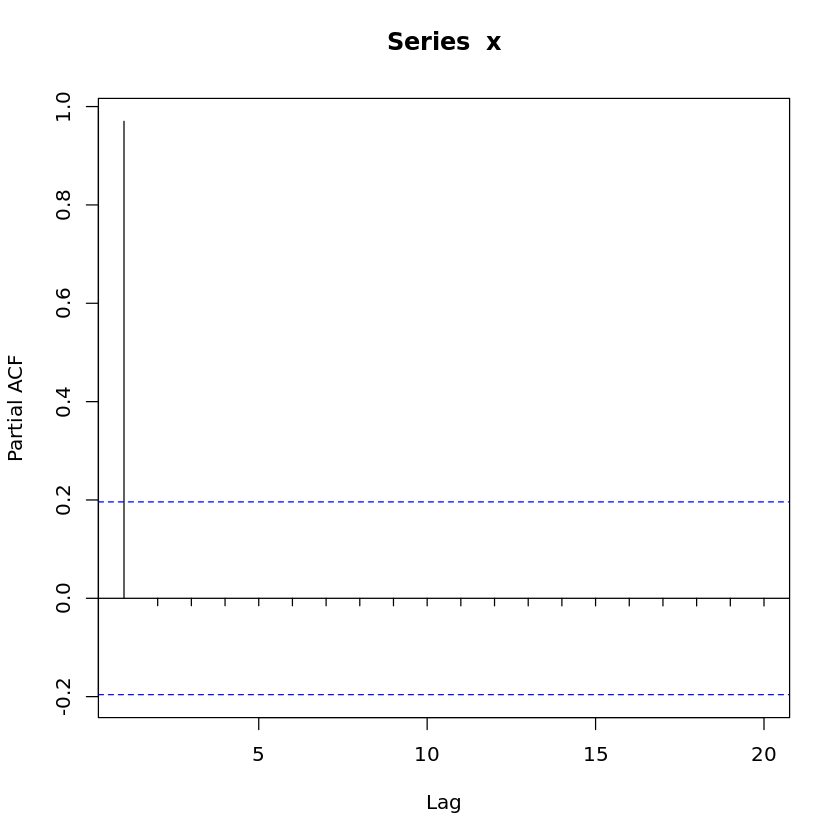

In [21]:
x <- 1:100
plot(x)
acf(x)
pacf(x)

The ACF is not informative. It has a similar value for every lag, seemingly implying
that all lags are equally correlated to the data. It’s not clear what this means, and it’s
more a case of being able to compute something, not being able to make that compu‐
ted quantity meaningful or sensible.

Luckily, the PACF is not as difficult to contemplate and gives us the information we
need, which is that the only significant PACF correlation is at lag 1. Why is that? For
a given point in time, once you know the point just before it, you know all the infor‐
mation the series can possibly give you about your point in time. This is due to the
next point in time being 1 plus the old point.

## Spurious Correlations
